In [2]:
#Importing necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import interpolation as inter

In [2]:
def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

TypeError: Image data of dtype object cannot be converted to float

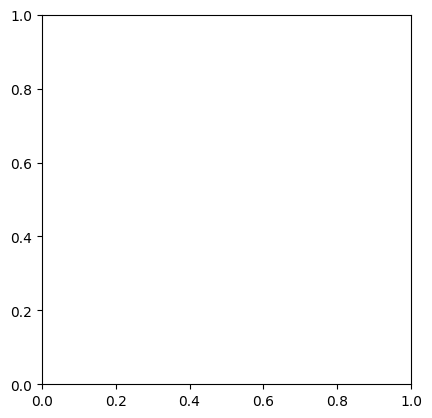

In [7]:
#reading the original image using OpenCV
image = cv2.imread(r'D:\major_project\megha\project-1\bro.png')
plt.imshow(image)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12968\853632182.py:3: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  data = inter.rotate(arr, angle, reshape=False, order=0)


0


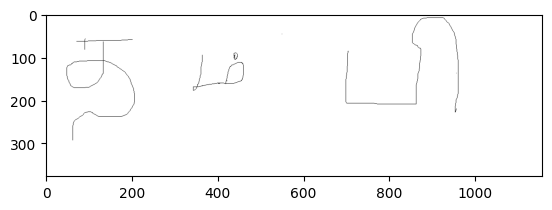

In [4]:
angle, rotated = correct_skew(image)
print(angle)
# cv2.imwrite('rotated-2.jpg', rotated)
gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(rotated)

In [5]:
# # Remove horizontal lines
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
# remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
# cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(rotated, [c], -1, (255,255,255), 5)

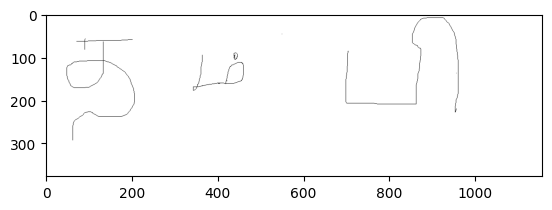

In [6]:
plt.imshow(rotated)

In [7]:
# vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
# remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
# cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(rotated, [c], -1, (255,255,255), 5)

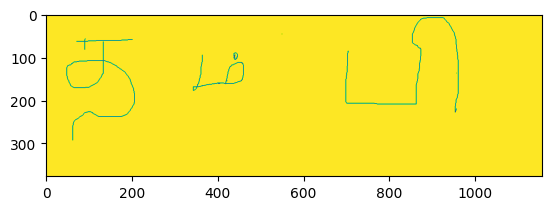

In [8]:
gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [9]:
# filter1 = cv2.medianBlur(gray,5)
# plt.imshow(filter1)

In [10]:
# filter2 = cv2.GaussianBlur(filter1,(5,5),0)
# plt.imshow(filter2)

In [11]:
# dst = cv2.fastNlMeansDenoising(filter2,None,17,9,17)
# plt.imshow(dst)

In [12]:
# th1 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# plt.imshow(th1)

In [13]:
# cv2.imwrite(r'ImagePreProcessingFinal-2.jpg', th1)

In [14]:
# image = cv2.imread(r"ImagePreProcessingFinal-2.jpg")
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (7, 7), 0)
# plt.imshow(gray)

In [15]:
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

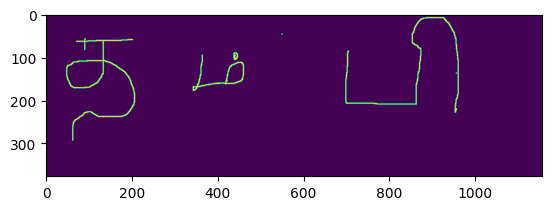

In [16]:
dilate = cv2.dilate(thresh1, None, iterations=1)
plt.imshow(dilate)

In [17]:
cnts,h = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)


contours_with_positions = []

# Loop through contours and store their positions
for contour in cnts:
    # Get the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    # Store the contour along with its position
    contours_with_positions.append((x, y, contour))

# Sort contours based on their x-coordinate
contours_with_positions.sort(key=lambda x: x[0])



In [18]:
# sorted_ctrs = sorted(contours_with_positions, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * image.shape[1] )
# # sorted_ctrs=cnts

In [19]:
orig = image.copy()
i = 0
for cnt in contours_with_positions:
    cnt=cnt[2]
    
    # Check the area of contour, if it is very small ignore it
    if(cv2.contourArea(cnt) < 200):
        continue

    # Filtered countours are detected
    x,y,w,h = cv2.boundingRect(cnt)

    # Taking ROI of the cotour
    roi = image[y:y+h, x:x+w]

    # Mark them on the image if you want
    cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)

    # Save your contours or characters
    cv2.imwrite(r"D:\major_project\megha\project-1\segmented_images" + f'\{i}' + ".png", roi)

    i = i + 1

In [20]:
cv2.imwrite('orig.jpg',orig)

True

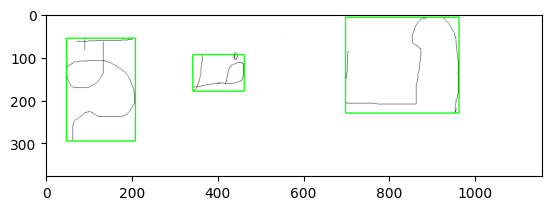

In [21]:
plt.imshow(orig)

In [7]:
def perform_segemenation(image_path):
    def correct_skew(image, delta=1, limit=5):
        def determine_score(arr, angle):
            data = inter.rotate(arr, angle, reshape=False, order=0)
            histogram = np.sum(data, axis=1)
            score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
            return histogram, score

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        scores = []
        angles = np.arange(-limit, limit + delta, delta)
        for angle in angles:
            histogram, score = determine_score(thresh, angle)
            scores.append(score)

        best_angle = angles[scores.index(max(scores))]

        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
                borderMode=cv2.BORDER_REPLICATE)

        return best_angle, rotated
    
    image = cv2.imread(image_path)
    plt.imshow(image)
    plt.show()
    angle, rotated = correct_skew(image)

    # cv2.imwrite('rotated-2.jpg', rotated)
    gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

    dilate = cv2.dilate(thresh1, None, iterations=4)
    plt.imshow(dilate)
    plt.show()

    cnts,h = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)


    contours_with_positions = []

    # Loop through contours and store their positions
    for contour in cnts:
        # Get the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        # Store the contour along with its position
        contours_with_positions.append((x, y, contour))

    # Sort contours based on their x-coordinate
    contours_with_positions.sort(key=lambda x: x[0])

    orig = image.copy()
    i = 0
    for cnt in contours_with_positions:
        cnt=cnt[2]
        
        # Check the area of contour, if it is very small ignore it
        if(cv2.contourArea(cnt) < 200):
            continue

        # Filtered countours are detected
        x,y,w,h = cv2.boundingRect(cnt)

        # Taking ROI of the cotour
        roi = image[y:y+h, x:x+w]

        # Mark them on the image if you want
        cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)

        # Save your contours or characters
        # cv2.imwrite(r"D:\major_project\megha\project-1\segmented_images" + f'\{i}' + ".png", roi)
        cv2.imwrite(f"segmented_images\\{i}.png",roi)

        # print(r"D:\major_project\megha\project-1\segmented_images" + f'\{i}' + ".png")
        
        
        i = i + 1
        print('hello')
    

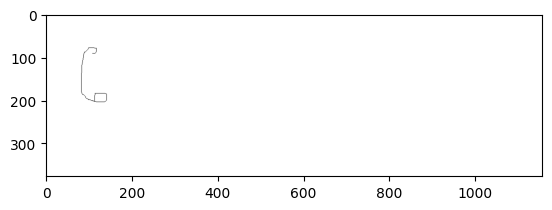

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3712\583003713.py:4: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  data = inter.rotate(arr, angle, reshape=False, order=0)


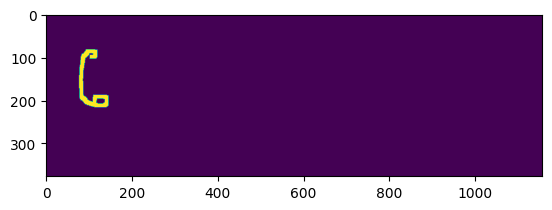

hello


In [8]:
perform_segemenation(r'D:\major_project\project-1\meg.png')